In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network
import torch


In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'jet1_pz', 'jet2_pz', 'jet3_pz', 'jet4_pz', 'jet1_energy', 'jet2_energy', 'jet3_energy', 'jet4_energy']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'jet1_pz', 'jet2_pz', 'jet3_pz', 'jet4_pz', 'jet1_energy', 'jet2_energy', 'jet3_energy', 'jet4_energy']]
# hh_all = hh_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
n_factors = np.shape(hh_all)[1]
print(n_factors)

# change this for testing w dummy variables
# n_factors = 2
# n_factors +=1
# print(n_factors)

1703 rows of qcd data
4605 rows of dihiggs data
12


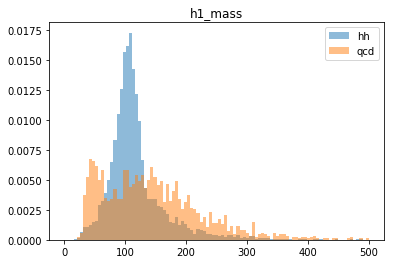

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

In [4]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# # print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
hh_all = np.append(hh_all, hh_labels, axis=1)
# hh_all = np.append(hh_all, 1-hh_labels, axis=1)## hh qcd labels 


# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
qcd = np.append(qcd, qcd_labels, axis=1) 
# qcd = np.append(qcd, 1-qcd_labels, axis=1)# qcd qcd labels


# use this for dummy variables
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
# hh_all[:,1] = np.random.rand(np.shape(hh_all)[0])
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
# qcd[:, 1] = -1 * np.random.rand(np.shape(qcd)[0])

# 

# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,n_factors:]
# for testing model resilience
# for i in range(2):
#     np.random.shuffle(all_labels)
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[ 5.83929176e-01  1.23727135e+02  1.83328407e+00  2.89078642e+00
  -9.21688505e+01 -6.81855941e+01 -1.32071364e+01  1.03543599e+02
   1.11300033e+02  9.22296314e+01  5.85612652e+01  1.06345804e+02
   1.00000000e+00]
 [-3.82704989e-01  7.76233425e+01  2.84355966e+00  1.90858838e+00
   4.86379988e+01 -7.03442094e+01 -5.47050092e+01 -1.50864266e+02
   1.42608668e+02  7.80770199e+01  7.05059247e+01  1.56858980e+02
   0.00000000e+00]
 [ 7.30151690e-02  1.78390904e+01  6.92389046e-01  5.39485992e-01
   7.90707911e+01  1.38688232e+01  3.62570042e+01  1.36103134e+01
   9.73367461e+01  3.14129415e+01  4.92461483e+01  2.83327086e+01
   1.00000000e+00]
 [ 2.75085143e-01  9.01747176e+01  2.65217628e+00  2.29208081e+00
   4.00118813e+02  9.47316545e+01 -1.03360419e+02 -4.30163383e+00
   4.09454216e+02  1.02313050e+02  1.28702877e+02  2.70073262e+01
   1.00000000e+00]]
[[1.]
 [0.]
 [1.]
 [1.]]


In [5]:
# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))
print(all_data[:4])


[[ 0.58419281  0.206275    0.33357623  0.57712665 -0.05276209 -0.09349191
  -0.01360928  0.12095912  0.06260362  0.12451174  0.03889375  0.08892334]
 [-0.38287777  0.12941183  0.51740149  0.38103722  0.02784284 -0.09645167
  -0.05637073 -0.17623889  0.08021398  0.10540545  0.04682686  0.13116103]
 [ 0.07304813  0.02974092  0.12598404  0.10770486  0.0452641   0.01901608
   0.037361    0.0158995   0.0547496   0.04240806  0.03270707  0.02369101]
 [ 0.27520934  0.15033719  0.48257822  0.45759898  0.22904816  0.12989024
  -0.10650765 -0.00502515  0.23030823  0.13812455  0.08547865  0.02258276]]


In [6]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.3, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)
train_data = torch.from_numpy(train_data)
# train_data = torch.zeros(len(train_labels), 4)
test_data = torch.from_numpy(test_data)
# test_data = torch.zeros(len(test_labels), 4)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)



torch.Size([1021, 12])
torch.Size([1703, 12])
torch.Size([1021, 1])
torch.Size([1703, 1])


In [7]:
learnRate = 0.01
np.random.seed(234)
node_list = [n_factors, 10, 10, 1]
old_model = Network(node_list)
model = Network(node_list, old_model.w_initial, old_model.b_initial)
model.train(train_data, train_labels, 7801, learnRate, 0, True, test_data, test_labels)

train accuracy at epoch 0 is: 50.24485798237023
test accuracy is: 50.32295948326483
train accuracy at epoch 300 is: 97.55142017629774
test accuracy is: 98.64944216089255
train accuracy at epoch 600 is: 98.23702252693438
test accuracy is: 99.1779213153259
train accuracy at epoch 900 is: 98.43290891283057
test accuracy is: 99.2953611274222
train accuracy at epoch 1200 is: 98.92262487757101
test accuracy is: 99.35408103347034
train accuracy at epoch 1500 is: 98.92262487757101
test accuracy is: 99.58896065766295
train accuracy at epoch 1800 is: 99.11851126346718
test accuracy is: 99.64768056371109
train accuracy at epoch 2100 is: 99.31439764936337
test accuracy is: 99.58896065766295
train accuracy at epoch 2400 is: 99.51028403525955
test accuracy is: 99.58896065766295
train accuracy at epoch 2700 is: 99.51028403525955
test accuracy is: 99.58896065766295
train accuracy at epoch 3000 is: 99.51028403525955
test accuracy is: 99.58896065766295
train accuracy at epoch 3300 is: 99.51028403525955


In [8]:
# testout = model.get_output().numpy()
# testout[testout>.5] = 1
# testout[test out<=.5] = 0
# print("train", np.sum(train_labels.numpy()))
# print("test", np.sum(test_labels.numpy()))
# print("out", np.sum(testout))
# print("train acc", (1-(np.sum(np.abs(train_labels.numpy()-testout))/len(train_labels.numpy())))
#      )
# print("test acc", (1-(np.sum(np.abs(test_labels.numpy()-testout))/len(test_labels.numpy())))
#      )


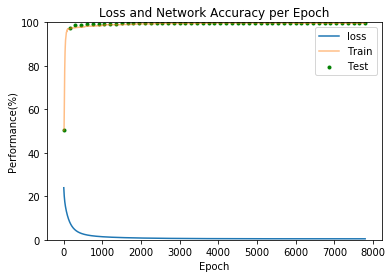

In [9]:
# print(model.losses)
plt.plot(model.losses, label="loss")
plt.plot(model.train_accuracies, label="Train", alpha=0.5)
plt.scatter(model.test_num, model.test_accuracies, label="Test", marker=".", color="green")
plt.xlabel("Epoch")
plt.ylabel("Performance(%)")
plt.title("Loss and Network Accuracy per Epoch")
plt.legend()
plt.ylim(0,100)
plt.show()

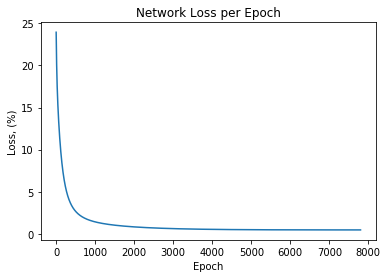

In [23]:
plt.plot(model.losses)
plt.title("Network Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss, (%)")
plt.show()

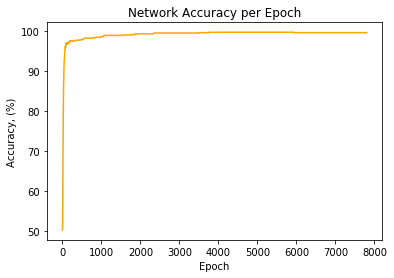

In [24]:
plt.plot(model.train_accuracies, label="Train", color="orange")
plt.title("Network Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy, (%)")
plt.show()

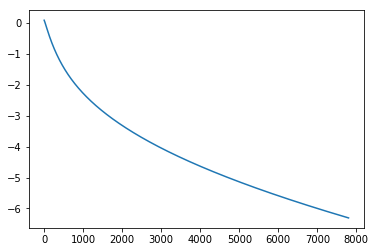

In [25]:
plt.plot(model.weight_change)

In [26]:
# print(len(model.weights))
# print(model.weights)

In [27]:
# print(model.biases)

In [28]:
print(model.layers)

[tensor([[2.1043e-03, 9.9798e-01, 9.9839e-01,  ..., 8.0383e-05, 2.1975e-01,
         9.8785e-01],
        [7.2996e-01, 3.7922e-04, 3.5877e-04,  ..., 8.5746e-01, 8.1699e-02,
         2.2621e-03],
        [9.7481e-01, 1.9384e-06, 6.1470e-07,  ..., 9.9448e-01, 5.8972e-02,
         1.6767e-05],
        ...,
        [4.5771e-02, 5.9340e-01, 5.4287e-01,  ..., 6.6316e-03, 9.8657e-02,
         3.0460e-01],
        [8.9529e-01, 2.9097e-05, 1.5612e-05,  ..., 9.6162e-01, 9.0898e-02,
         1.6067e-04],
        [3.0407e-01, 1.3657e-02, 8.2973e-03,  ..., 2.1849e-01, 1.3716e-01,
         1.8616e-02]]), tensor([[9.9981e-01, 8.4645e-02, 5.8439e-05,  ..., 3.6937e-01, 9.9659e-01,
         5.0172e-02],
        [1.2427e-02, 9.7018e-01, 9.9883e-01,  ..., 2.0265e-01, 9.3556e-02,
         8.4600e-01],
        [9.1965e-03, 9.8394e-01, 9.9950e-01,  ..., 1.4541e-01, 8.1305e-02,
         8.9119e-01],
        ...,
        [9.8942e-01, 2.0548e-01, 3.3445e-03,  ..., 4.1593e-01, 9.1160e-01,
         1.9817e-01],
 

In [29]:
# out_labels = model.get_output()
# a = out_labels[:,0]
# # b = out_labels[:,1]
# c = (a+b)
# print(c)
# print(0.7336+0.1798)
# print(c.shape)

In [30]:
print(model.weights)

[tensor([[-6.3048e+00,  1.3085e+01,  1.2577e+01, -2.0297e+01,  1.3427e+01,
          9.8616e+00, -9.5434e-01, -1.0533e+01,  7.4703e-01,  9.0287e+00],
        [-2.5943e-01, -2.7306e-01, -1.1302e-01,  1.5194e+00,  2.1304e+00,
          4.6396e-01, -7.9293e-01,  2.6413e-02, -7.3807e-01,  8.1962e-01],
        [ 3.1289e-01, -5.1541e-01, -2.5550e+00,  8.8037e-01,  2.5283e-01,
         -2.7452e-05, -4.0235e-01, -1.8589e+00, -1.2639e+00, -3.0329e+00],
        [ 3.8000e-02,  6.8299e-01,  4.4112e-02, -9.9089e-01, -1.4067e-01,
         -2.1439e+00,  2.5755e-01, -8.5699e-01,  1.7635e+00,  5.1018e-01],
        [-2.2383e-01,  2.7735e-01, -4.2682e-01, -4.0349e-01,  3.9628e-01,
         -8.0936e-01,  3.7370e-02,  6.2696e-01,  9.6395e-01,  6.7090e-01],
        [ 4.7236e-01, -9.2952e-01,  1.3455e+00,  3.6899e-01,  4.5736e-01,
         -2.2616e-02, -3.2503e-01,  7.9739e-01,  1.7146e+00,  1.5329e+00],
        [ 2.3089e-01, -1.4824e-01,  7.4280e-01, -4.7580e-01, -9.3468e-01,
         -1.0108e+00, -3.5161e-

In [31]:
print(1-sum(train_labels)/len(train_labels))

tensor([0.4976], dtype=torch.float64)


In [32]:
print(train_data)

tensor([[ 0.6640,  0.1558,  0.0953,  ...,  0.0738,  0.0781,  0.1254],
        [-0.4487,  0.2237,  0.1024,  ...,  0.1317,  0.0886,  0.0386],
        [-0.8527,  0.3008,  0.6195,  ...,  0.0883,  0.0650,  0.0708],
        ...,
        [ 0.2106,  0.1658,  0.2521,  ...,  0.0566,  0.1081,  0.0941],
        [-0.6276,  0.1645,  0.5134,  ...,  0.0564,  0.0993,  0.0209],
        [-0.1671,  0.1964,  0.3066,  ...,  0.0371,  0.0492,  0.0445]],
       dtype=torch.float64)


In [33]:
print(model.biases)

[tensor([[-2.0311, -2.0311, -2.0311, -2.0311, -2.0311, -2.0311, -2.0311, -2.0311,
         -2.0311, -2.0311]]), tensor([[-0.0719, -0.0719, -0.0719, -0.0719, -0.0719, -0.0719, -0.0719, -0.0719,
         -0.0719, -0.0719]]), tensor([[-0.2113]])]


In [34]:

pred = model.pred(test_data)[-1].numpy()
actual = test_labels.numpy()
print(pred)
pred[pred>.5] = 1
pred[pred<.51] = 0
print(pred)

print(sum(train_labels)/len(train_labels))
print(sum(test_labels)/len(train_labels))

print("ASDF", sum(pred)/len(pred))

[[0.9985153 ]
 [0.00189979]
 [0.00188206]
 ...
 [0.9985757 ]
 [0.99847406]
 [0.00191582]]
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
tensor([0.5024], dtype=torch.float64)
tensor([0.8394], dtype=torch.float64)
ASDF [0.504404]
